In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import sys, os
os.chdir(sys.path[0])

# 1. Bag Of Words

## 1. Stemming

In [11]:
text = open('books/o-pioneers.txt', mode='r', encoding='utf-8').read()
stopwords = open('stopwords.txt', 'r').read().split()
ps = PorterStemmer()

data = WordCloud(stopwords=stopwords).process_text(text) # getting word counts
print('total word count:')
print('before pre-processing: ' + str(len(data)))

stemmed = {}
for word in data:
    stemmed[ps.stem(word)] = data[word]
print('after stemming: ' + str(len(stemmed)))

df = pd.DataFrame(stemmed.items(), columns=['word', 'count']) # converting to dataframe
# display((df.sort_values(by=['count'], ascending=False).head(30)))

total word count:
before pre-processing: 4817
after stemming: 3869


## 2. Lemmatization

In [12]:
text = open('books/o-pioneers.txt', mode='r', encoding='utf-8').read()
stopwords = open('stopwords.txt', 'r').read().split()
lemmatizer = WordNetLemmatizer()

data = WordCloud(stopwords=stopwords).process_text(text) # getting word counts

lemma = {}
for word in data:
    lemma[lemmatizer.lemmatize(word)] = data[word]

print('after lemmatization: ' + str(len(lemma)) + '\n')
# print(lemma)

after lemmatization: 4779



In [13]:
df = pd.DataFrame(lemma.items(), columns=['word', 'count']) # converting to dataframe
display((df.sort_values(by=['count'], ascending=False).head(20)))

,word,count
253,Alexandra,419
233,Emil,302
440,Marie,151
261,Carl,145
8,little,141
114,boy,139
792,thing,130
643,Lou,119
1164,Ivar,108
2054,Frank,104


# 2. Wordcloud

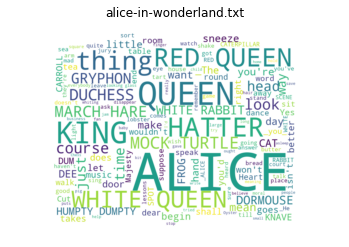

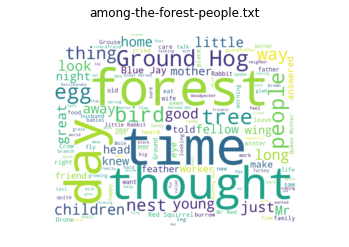

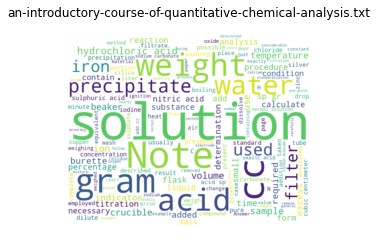

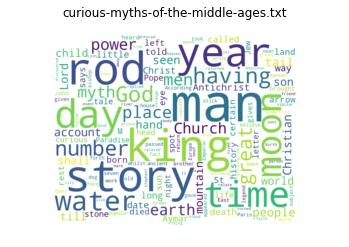

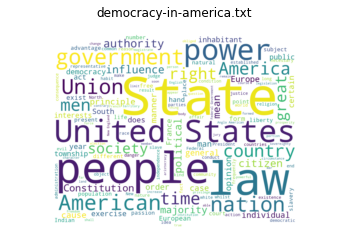

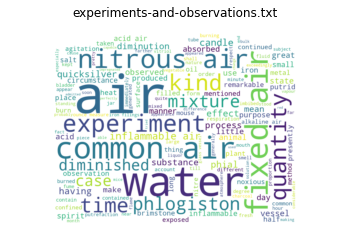

TypeError: unsupported operand type(s) for +: 'Image' and 'bool'

In [4]:
books = os.listdir("books")
stopwords = open('stopwords.txt', 'r').read().split()

from PIL import Image
import numpy as np
mask=np.array(Image.open('./mask.jpg'))

for book in books:

        text = open('books/' + book, mode='r', encoding='utf-8').read()
        wc = WordCloud(
            mask=mask, 
            background_color='white', 
            stopwords=stopwords, 
            height=mask.shape[0], 
            width=mask.shape[1], 
            max_words=150, 
            max_font_size=250
        )
        wc.generate(text)
        plt.imshow(wc, interpolation = 'bilinear')
        plt.axis('off')
        plt.title(book)
        plt.show()